In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
df_CSeguroM = pd.read_csv("/content/drive/MyDrive/Universidad/Cursos/Python Data Science/Datasets/M2/insurance.csv")
df_CSeguroM.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
df_CSeguroM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df_CSeguroM.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


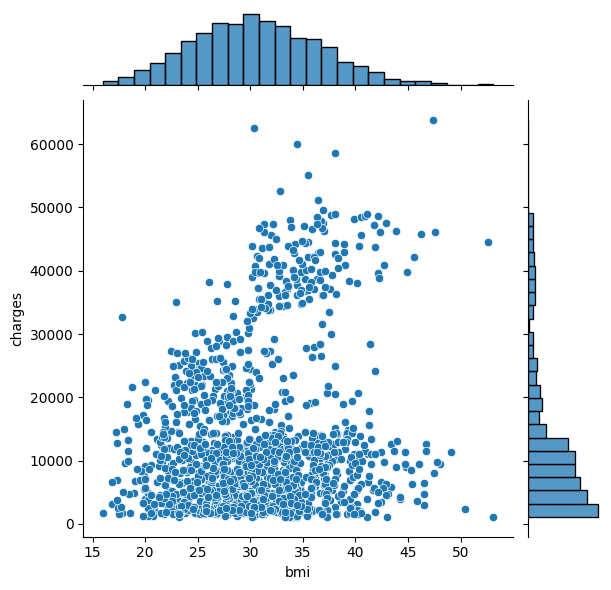

In [59]:
sns.jointplot(x="bmi", y="charges", data=df_CSeguroM)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# extrayendo la información del dataset
X = df_CSeguroM["bmi"]
X

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [62]:
y = df_CSeguroM["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [63]:
# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(1003,)


In [64]:
print(y_train.shape)

(1003,)


In [65]:
X_train_reshaped = X_train.values.reshape(-1, 1)

In [66]:
X_test_reshaped = X_test.values.reshape(-1, 1)

In [67]:
from sklearn.linear_model import LinearRegression

model_R = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
model_R.fit(X_train_reshaped, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo es: {model_R.coef_}, el intercepto es {model_R.intercept_}")

La pendiente del modelo es: [344.62605783], el intercepto es 2574.9458000498817


In [68]:
print(f"La precisión del modelo es: {model_R.score(X_test_reshaped,y_test)}")

La precisión del modelo es: 0.054910766848181414


In [69]:
y_pred = model_R.predict(X_test_reshaped)
y_pred

array([13258.35359278, 12582.88651943, 10137.76463913, 12986.0990071 ,
        9450.23565376, 11052.74682267, 14361.15697784, 16084.28726699,
       11218.16733043, 13084.31743358, 12844.80232339, 13346.23323753,
       15877.51163229, 11259.52245737, 14557.5938308 , 11087.20942845,
       17207.76821551, 12848.24858396, 14262.93855136, 12920.62005611,
       11900.52692493, 12293.40063086, 14328.41750234, 13265.24611394,
       10742.58337062, 13084.31743358, 12844.80232339, 15350.23376381,
       13706.36746796, 13706.36746796, 16816.61763988, 10952.8052659 ,
       10105.02516364,  9090.10142333, 10530.63834506, 15877.51163229,
       12331.30949722, 10118.81020595, 14533.47000675, 14288.78550569,
       18610.39627088, 12924.06631669, 15343.34124265, 13182.53586006,
       12317.52445491, 13706.36746796, 17094.04161643, 18979.14615276,
       12003.91474228, 13809.75528531, 14602.39521832, 16297.95542284,
       14430.0821894 , 13809.75528531, 11218.16733043, 13870.06484543,
      

Text(0.5, 1.0, 'Costos del seguro medico según el ibm(IMC)')

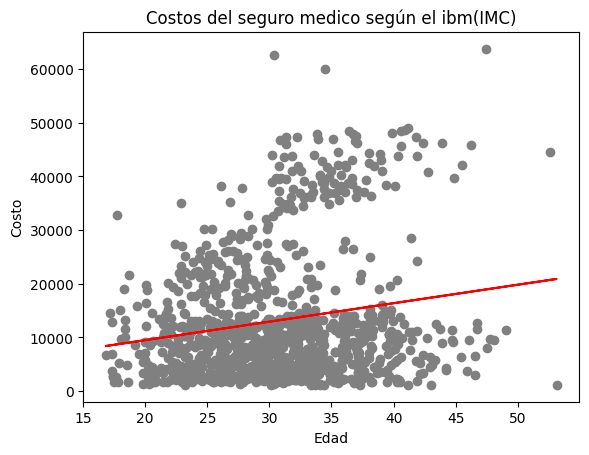

In [70]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train_reshaped, model_R.predict(X_train_reshaped), color = 'red')
plt.ylabel('Costo')
plt.xlabel('Edad')
plt.title('Costos del seguro medico según el ibm(IMC)')

#REGRESIÓN MULTIPLE

In [71]:
#Convierte los datos de sexo entre 0 y 1 female = 0 y male = 1

def changeSex(atributo):
  if atributo=='female':
    return 0
  return 1

In [72]:
#Convierte los datos de smoker entre 0 y 1 no = 0 y yes = 1
def changeSmoker(atributo):
  if atributo=='no':
    return 0
  return 1

In [73]:
df_CSeguroM['SexTransf']=df_CSeguroM['sex'].apply(changeSex)
df_CSeguroM['SexTransf']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: SexTransf, Length: 1338, dtype: int64

In [74]:
df_CSeguroM['smokerTransf']=df_CSeguroM['smoker'].apply(changeSmoker)
df_CSeguroM['smokerTransf']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smokerTransf, Length: 1338, dtype: int64

In [75]:
df_CSeguroM

,age,sex,bmi,children,smoker,region,charges,SexTransf,smokerTransf
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [76]:
# extrayendo la información del dataset
X2 = df_CSeguroM.iloc[:,[0,7,2,3,8]]
X2

,age,SexTransf,bmi,children,smokerTransf
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [77]:
y2 = df_CSeguroM["charges"]
y2

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [78]:
# particionando en dos conjuntos _train y _test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)
print(X_train2.shape)

(1003, 5)


In [79]:
model_R2 = LinearRegression(fit_intercept = True)

model_R2.fit(X_train2, y_train2)

print(f"La pendiente del modelo es: {model_R2.coef_}, el intercepto es {model_R2.intercept_}")

La pendiente del modelo es: [  264.7099454    350.92418869   336.09352751   491.87864102
 23454.68393566], el intercepto es -12867.08379926196


In [80]:
print(f"La precisión del modelo es: {model_R2.score(X_train2,y_train2)}")

La precisión del modelo es: 0.7440604423512807


In [81]:
y_pred2 = model_R2.predict(X_test2)
y_pred2

array([39380.87651291, 39138.14489105,  3994.4672901 , 10128.52186738,
       35831.95212393, 29886.41227895, 38266.461072  ,  1787.17147228,
       12839.67420279, 12083.97736732,  7680.51181786,  5002.95270186,
       31006.00227574, 28312.47608159, 11540.23170254, 14528.46929462,
        2762.13624961, 10006.43391624, 12410.7897314 ,  8232.14071285,
        3335.61122388, 39935.05268377, 14497.41693581, 35325.68063053,
       27317.23294031, 11932.23139658, 13284.48025802,  5765.4472005 ,
       28997.84574781,  7909.57873605, 11214.01845055, 10169.55950434,
        2375.48352302, 33304.03042028, 12558.91588006, 12031.73540167,
       11658.96192605, 14209.18044348,  5468.94061424, 13133.9737943 ,
       10141.29711905,  5660.93971672,  2328.20946659, 33048.17354757,
        3243.1975208 , 11136.89025952, 13684.07289817, 25738.25213239,
       14554.91805931,  5611.18445897,  4061.16267612,  9117.96491276,
        4320.66110596,  5114.97627945,  3450.61667851,  8967.52906564,
      

In [82]:
mse = mean_squared_error(y_test2,y_pred2)
mse

35332394.03725022

In [83]:
rmse = np.sqrt(mse)
rmse

5944.1058231873885

In [84]:
rScore = r2_score(y_test2,y_pred2)
rScore

0.7634951152011309

#REDUCCIÓN DE DIMENSIONALIDAD CON PCA

In [85]:
from sklearn.decomposition import PCA

In [86]:
def mse(y_real,y_pred):
  n = len(y_real)
  mse = np.sum((y_real - y_pred)**2) / n
  return mse

In [87]:
def rmse(y_real,y_pred):
  n = len(y_real)
  mse = np.sum((y_real - y_pred)**2) / n
  rmse = np.sqrt(mse)
  return rmse

In [88]:
pca = PCA(n_components=2)

In [89]:
xreduc = pca.fit_transform(X2)

In [90]:
y3 = y2

In [91]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(xreduc, y3, test_size=0.25)
print(X_train3.shape)

(1003, 2)


In [92]:
model3 = LinearRegression()

In [93]:
model3.fit(X_train3,y_train3)

LinearRegression()

In [94]:
y_pred3 = model3.predict(X_test3)
y_pred3

array([18410.36852214,  7559.19959787, 18569.76090122, 20096.77066633,
       10954.72702559,  7013.18315592, 15057.47974486, 17901.4203821 ,
       10734.88605862,  6617.04445357, 19479.96304538, 22771.74699277,
       11146.59670629, 11604.25885531, 20386.38862103, 12737.43816556,
       13506.61321081, 15742.05293832, 16878.97263609,  8534.36549891,
       14684.37725165,  9657.70028555, 18319.85924828, 16162.33473327,
       17777.09507335, 11018.57246388, 11725.08508585, 18562.71071778,
       17137.57571397, 19031.53299693,  8055.26018534, 10805.4454097 ,
       16877.10289942,  8466.88301454, 15643.160548  , 11132.4154348 ,
       16400.60769231,  2908.0700243 , 16700.02381834, 10335.31031583,
        9975.12742175, 10437.19400648,  5324.81026449, 15094.50862073,
        9638.31844899, 14636.61969239, 11181.74646006, 19190.01317873,
        8521.77958103, 10152.95324679, 15789.16018118, 15322.93247318,
       16007.22133656, 15717.03172281, 12771.35452111,  9906.31962048,
      

In [95]:
mse = mse(y_test.values,y_pred3)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 174266706.3740547


In [96]:
rmse = rmse(y_test.values,y_pred3)
print(f"Raiz cuadrada del error cuadrático medio: {rmse}")

Raiz cuadrada del error cuadrático medio: 13201.011566317738


In [97]:
r2 = model3.score(X_test3,y_test3)
r2

0.0908087549369393

In [98]:
print(f"Coeficientes: {model3.coef_}")

Coeficientes: [271.65120528 312.09869955]


In [99]:
print(f"Intercepto: {model3.intercept_}")

Intercepto: 13088.747733602182


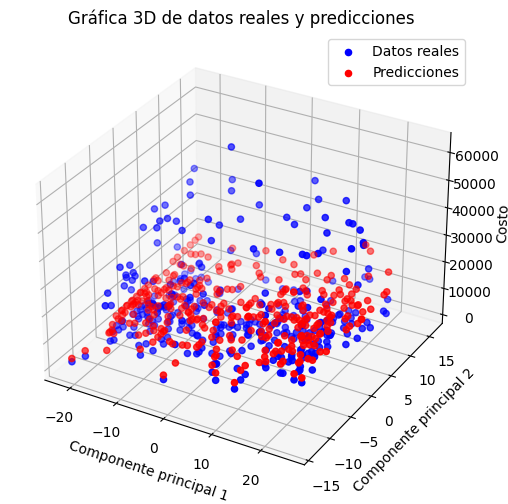

In [100]:
#Grafica 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test3[:, 0], X_test3[:, 1], y_test3, color='blue', label='Datos reales')
ax.scatter(X_test3[:, 0], X_test3[:, 1], y_pred3, color='red', label='Predicciones')

ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Costo')

plt.title('Gráfica 3D de datos reales y predicciones')
plt.legend()

plt.show()
